### IBM HR Analytics Employee Attrition & Performance

![Getting Started](empleados2.jpg)

Image https://unsplash.com/@anniespratt

Attrition is the silent killer that can swiftly disable even the most successful and stable of organizations in a shockingly spare amount of time. While many companies put an emphasis on the costly process of hiring and recruiting, there isn’t enough attention invested in solving the issues that cause top talent to leave. Although compensation is the most commonly associated reason behind attrition, let's make an analysis to see if this is really one of the most important motives ¡¡¡

Understanding the motivations behind employee attrition is the essential first step in understanding the problem and properly addressing it before substantial, long-lasting damage is caused to your organization. Thankfully, with this EDA we will be able to provide employers the actionable insights they need to better understand their employees and make any necessary changes before turnover rates swell, productivity drops, and the entire company’s future is suddenly less bright.

### What does employee attrition mean?
The attrition rate is a calculation of the number of individuals that leave or move out of a business over a specified time frame.

### What is the difference between employee turnover and attrition?
Both terms are used when an employee leaves a company but with a difference in processes, such as discharge, termination, or resignation. Attrition occurs when an employee retires or when the employer terminates the job position. When employee turnover occurs, the employers look for a replacement.

### What is a good employee attrition rate?
A good, average turnover rate is around 10%.

### What are some effective methods to reduce a high attrition rate?
* Recruit and hire the right people.
* Offer benefits and compensation.
* Offer flexibility.
* Pay attention to employee engagement.
* Recognize and reward employees.

Well, let's get down to work then, let's see what's going on at IBM!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'
sns.set_style("white")
rcParams['figure.figsize'] = 6,4
import matplotlib.ticker as ticker

In [2]:
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


Do we have null values ?

In [3]:

null = df.isnull().sum() 
null[null > 0] # Noo, fortunately there are none

Series([], dtype: int64)

Let's convert our output variable from categorical to numerical

In [4]:
y_dict = {"Yes":1,"No":0}
df["Attrition_numeric"] = df["Attrition"].map(y_dict)


These columns are of no use to us, throw them away!

In [5]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours',"Attrition"], axis="columns", inplace=True)

Let's make a quick summary of the variables and see what we find ¡

In [6]:
#describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


### podemos hacer cross tables como udemy

* The average age is 36 years, there are very young people with 18 years (young trainees or interns?) and people with 60 years (managers with many years of work?).
* There are people who live very close to work, almost next door, and others are almost an hour's drive away!
* Salaries are a world of their own! The average is 6500 usd, the lowest earners reach 1000 usd (the young trainees?) and the highest earners almost 20000 usd (that 60 year old boss with many years behind him?).
* There are employees who have been working for almost 40 years and others who have just started! The average, however, is 7 years (I don't think that's bad at all).

We are going to separate the workers into two dataframes according to Attrition and compare their averages

In [7]:
attrition_yes = df.loc[df["Attrition_numeric"] == 1]
attrition_no = df.loc[df["Attrition_numeric"] == 0]


In [8]:
# I use concat to join the two DF, rename the columns and then give it some color :)
df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
df_mean_attrition.columns = ["Yes","No"]
df_mean_attrition.round(2).style.background_gradient(cmap="tab20_r",axis=1)

,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000
JobSatisfaction,2.470000,2.780000
MonthlyIncome,4787.090000,6832.740000


### aqui podemos sacar mas datos (escribir)

### What is a good employee attrition rate?
A good, average turnover rate is around 10%.


In [9]:
tasa_att = (df["Attrition_numeric"].sum() / df.shape[0]) * 100
print("Average Turnover rate at IBM is :",round(tasa_att,2))

Average Turnover rate at IBM is : 16.12


Ummmm the average is very high compared to what would be normal, we will have to keep on working...this also represents a problem when making predictions since the classes are not balanced.

Text(0, 0.5, 'Frecuency')

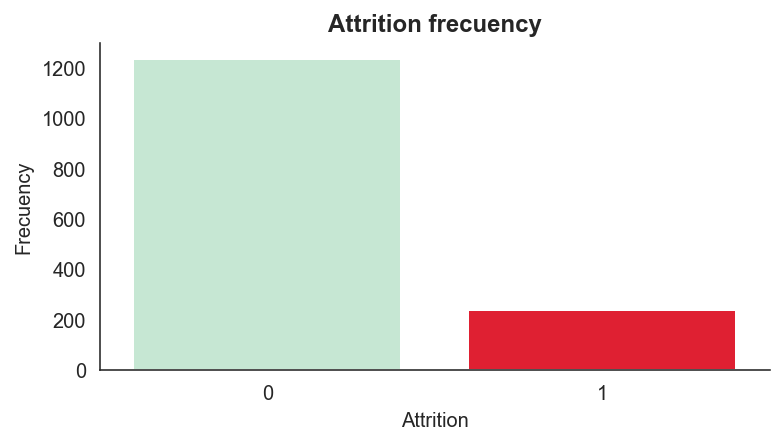

In [10]:
# let,s plot "Attrition frecuency"
#colors = ["#E8DC90","#BEE4D7"]
colors = ["#C0EDD2","#FF0018"]
df_class = df["Attrition_numeric"].value_counts().reset_index()
plt.figure(figsize=(6,3))
sns.barplot(x="index",y="Attrition_numeric",data=df_class,palette=colors)
sns.despine()
plt.title("Attrition frecuency",fontweight="bold")
plt.xlabel("Attrition")
plt.ylabel("Frecuency")

I am going to separate the numerical columns from the categorical columns; using describe makes it very easy 

In [11]:
# numeric and categoric
num_col = df.describe().columns.tolist()
cat_col = df.describe(include="object").columns.tolist()

### Detecting Multicollinearity
I will make a heatmap to see the correlation between the variables. 

In [12]:
## corr
corr = df[num_col].corr()

Text(0.5, 1.0, 'HeatMap of all the Feature Variables')

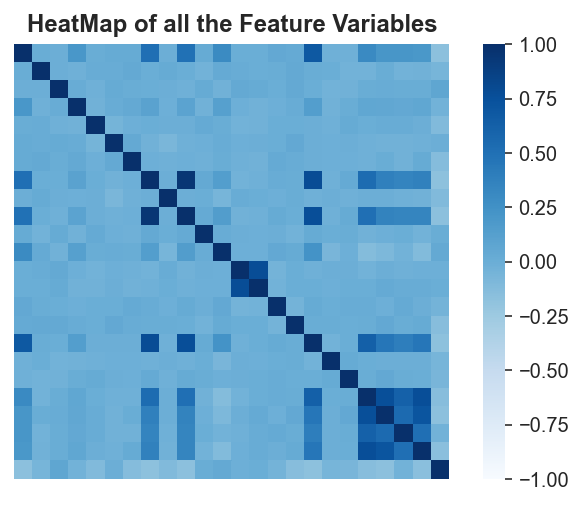

In [13]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    square=True,xticklabels=False, yticklabels=False)
plt.title("HeatMap of all the Feature Variables",fontweight="bold")


we see that there is Multicollinearity; it is normal because there are variables that are related to each other, for example salary and years. Further on we will see which are the most important variables, for example using a PCA.

Now, the correlation with respect to our output variable; we see interesting things that affect how JobLevel,Age,TotalWorkingYears,YearsincurrentRole..

In [14]:
#to_frame().style.background_gradient(cmap='viridis')
corr["Attrition_numeric"].to_frame().style.background_gradient(cmap="Blues") #sns.diverging_palette(150,80,n=200,as_cmap=True))

,Attrition_numeric
Age,-0.159205
DailyRate,-0.056652
DistanceFromHome,0.077924
Education,-0.031373
EnvironmentSatisfaction,-0.103369
HourlyRate,-0.006846
JobInvolvement,-0.130016
JobLevel,-0.169105
JobSatisfaction,-0.103481
MonthlyIncome,-0.159840


### A quick summary of the categorical variables!

In [15]:
df.describe(include="object").T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


we see that the most frequent is a person who travels rarely, from the Research & Development department , educated in Life Sciences , gender Male, Married, Sales Executive and no OverTIme

### Visualizing data is always a great help, let's get to it!

In [16]:
by_bussines =df.groupby("BusinessTravel")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

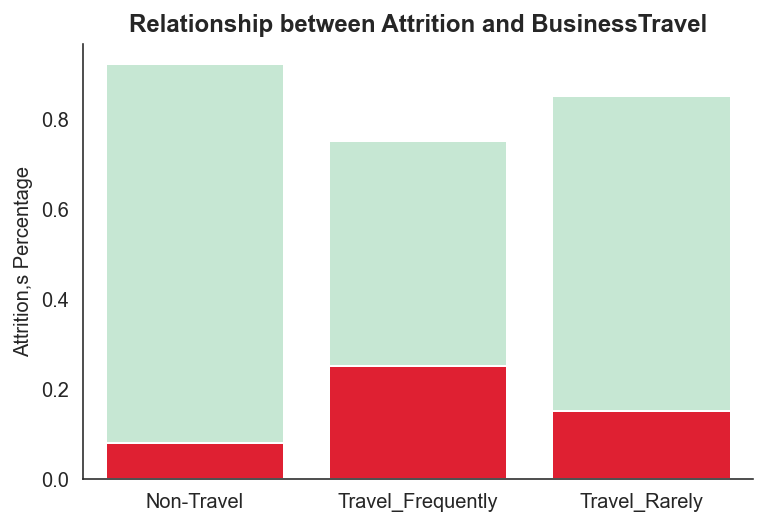

In [17]:
# bussines travel
#colors = ["#C0EDD2","#FF0018"]
plt.figure(figsize=(6,4))
sns.barplot(x=by_bussines.index,y=('Attrition_numeric', 0),data=by_bussines,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_bussines.index,y=('Attrition_numeric', 1),data=by_bussines,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.title("Relationship between Attrition and BusinessTravel",fontweight="bold")
plt.ylabel("Attrition,s Percentage")
plt.xlabel("")
plt.grid(False)
sns.despine()

In [18]:
# We found that employees who are more likely to travel for work are more likely to resign.

### representar el porcentaje sobre su departamento con grafica ¡¡¡

In [19]:
### poner un titulo abajo, es por columnas no por filas ¡¡ para que se entienda

In [20]:
by_jobRole =df.groupby("JobRole")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()
by_jobRole.style.background_gradient(cmap='Blues',axis=0)

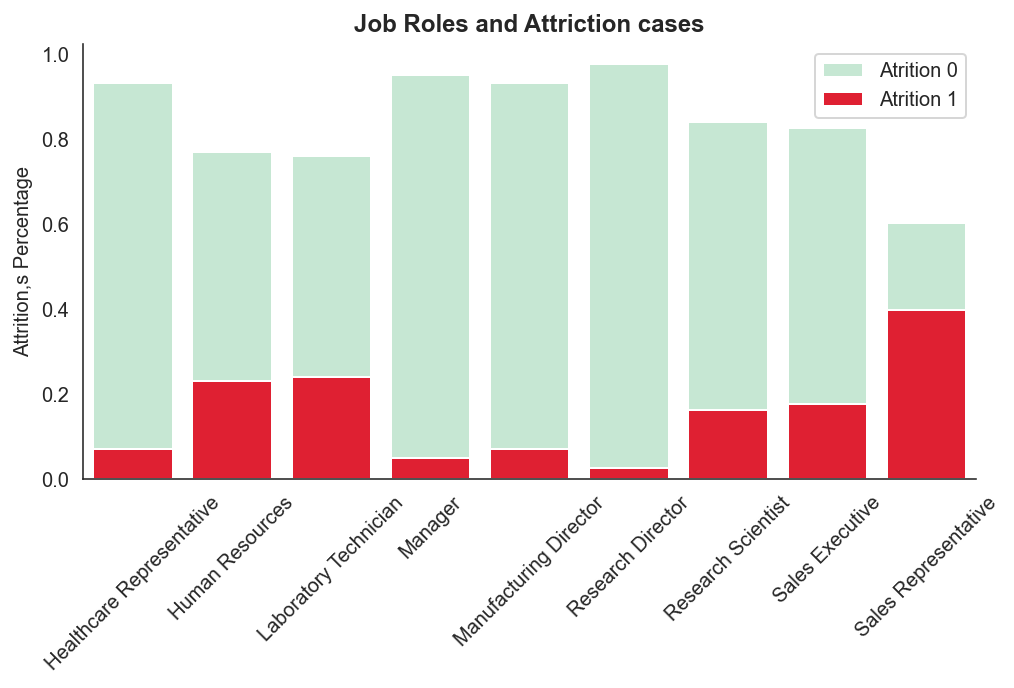

In [21]:
#colors = ["#C0EDD2","#FF0018"]

#plot
plt.figure(figsize=(8,4))
sns.barplot(x=by_jobRole.index,y=('Attrition_numeric', 0),data=by_jobRole,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_jobRole.index,y=('Attrition_numeric', 1),data=by_jobRole,color="#FF0018",label="Atrition 1")

#sns.countplot(x="JobRole", hue='Attrition_numeric', data=by_jobRole,palette=colors)
#g.set_xticklabels(g.get_xticklabels(),fontsize=8, rotation=45)
plt.ylabel('')
plt.title("Job Roles and Attriction cases",fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Attrition,s Percentage")
plt.grid(False)
sns.despine()
plt.legend()


In [22]:
by_department =df.groupby("Department")["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()
by_department.style.background_gradient(cmap='Blues',axis=0)

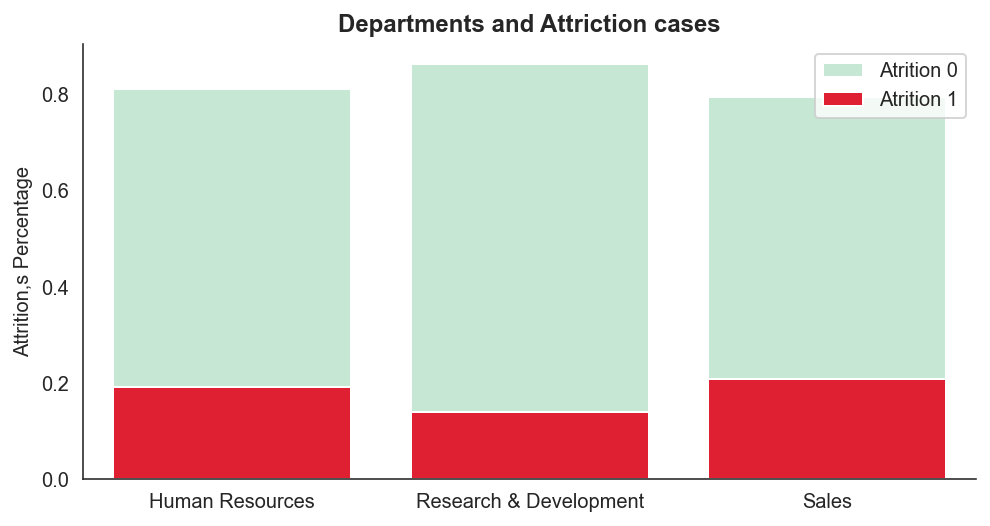

In [23]:
#department
#colors = ["#C0EDD2","#FF0018"]
plt.figure(figsize=(8,4))
sns.barplot(x=by_department.index,y=('Attrition_numeric', 0),data=by_department,color="#C0EDD2",label="Atrition 0")
sns.barplot(x=by_department.index,y=('Attrition_numeric', 1),data=by_department,color="#FF0018",label="Atrition 1")
plt.ylabel('')
plt.title("Departments and Attriction cases",fontweight="bold")
plt.xlabel("")
plt.ylabel("Attrition,s Percentage")
plt.grid(False)
plt.legend()
sns.despine()

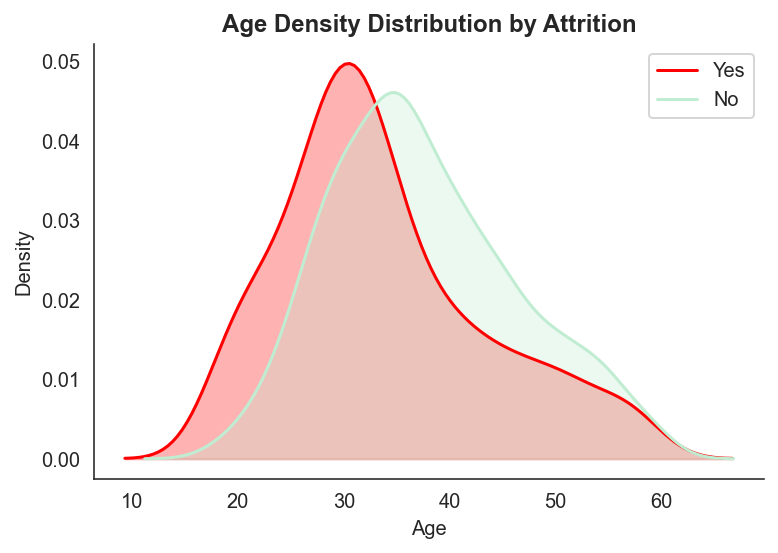

In [24]:
# age
plt.figure(figsize=(6,4))
ax = sns.distplot(attrition_yes["Age"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["Age"],hist=False,label="No",color="#C0EDD2")
plt.title("Age Density Distribution by Attrition",fontweight="bold")
plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
plt.show(block=False)

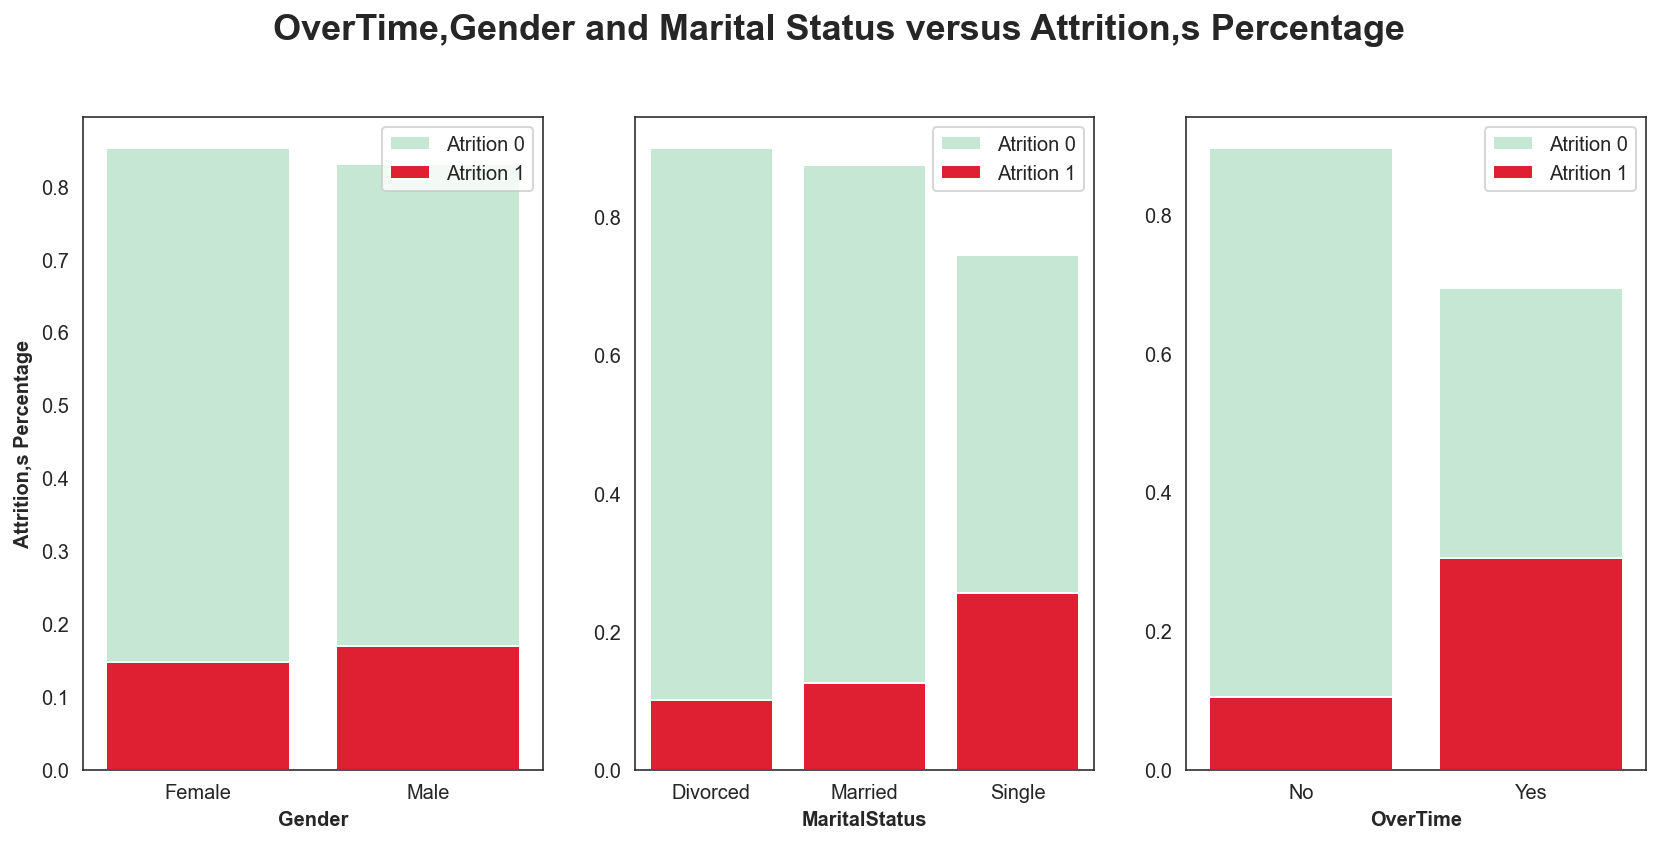

In [25]:
# marital status and gender
#colors = ["#C0EDD2","#FF0018"]
plt.figure(figsize=(14,6))
plt.suptitle('OverTime,Gender and Marital Status versus Attrition,s Percentage',fontweight="bold",fontsize=18,y=1.0)

for i,column in enumerate(["Gender","MaritalStatus","OverTime"],1):
    group =df.groupby(column)["Attrition_numeric"].value_counts(normalize=True).to_frame().unstack()

    plt.subplot(1, 3,i)
    sns.barplot(x=group.index,y=('Attrition_numeric', 0),data=group,color="#C0EDD2",label="Atrition 0")
    sns.barplot(x=group.index,y=('Attrition_numeric', 1),data=group,color="#FF0018",label="Atrition 1")
    if i == 1:
        plt.ylabel("Attrition,s Percentage",fontweight="bold")
    else:
        plt.ylabel("",fontweight="bold")
    plt.xlabel(column,fontweight="bold")
    plt.legend()
    plt.grid(False) 
    
    


### hacer esemble method y voting
https://towardsdatascience.com/how-voting-classifiers-work-f1c8e41d30ff

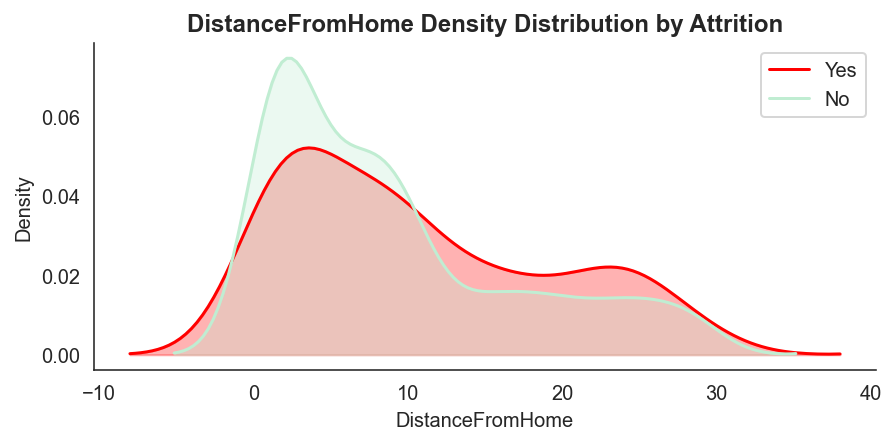

In [26]:
plt.figure(figsize=(7,3))
ax = sns.distplot(attrition_yes["DistanceFromHome"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["DistanceFromHome"],hist=False,label="No",color="#C0EDD2")
plt.title("DistanceFromHome Density Distribution by Attrition",fontweight="bold")
plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
plt.show(block=False)

### sueldos y boxplot

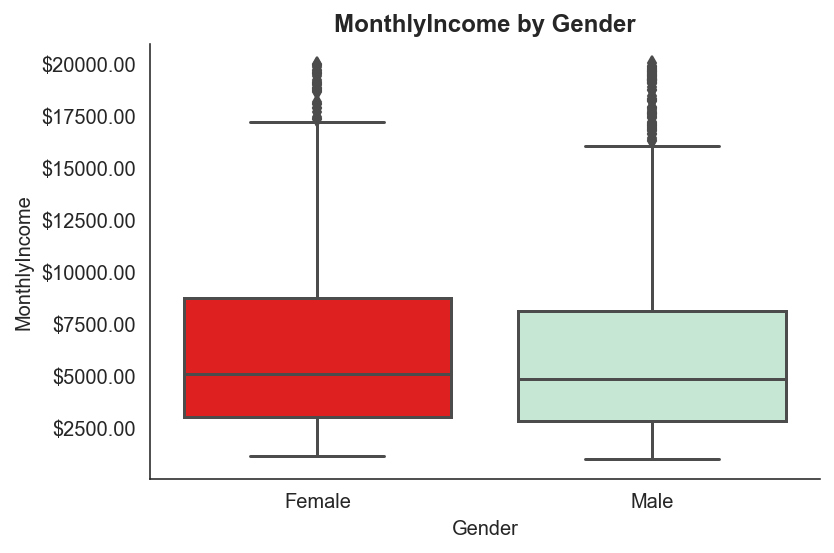

In [27]:
ax = sns.boxplot(x="Gender",y='MonthlyIncome',data=df,palette={"Female":"red","Male":"#C0EDD2"})
sns.despine()
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.title("MonthlyIncome by Gender",fontweight="bold")
plt.show(block=False)

### ruta

* categorical fatures (cat_col,num_col)
* robust scaler
* pca (tambien podemos graficar con dos features y hue)
* vote esemble

In [29]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_numeric'],
      dtype='object')

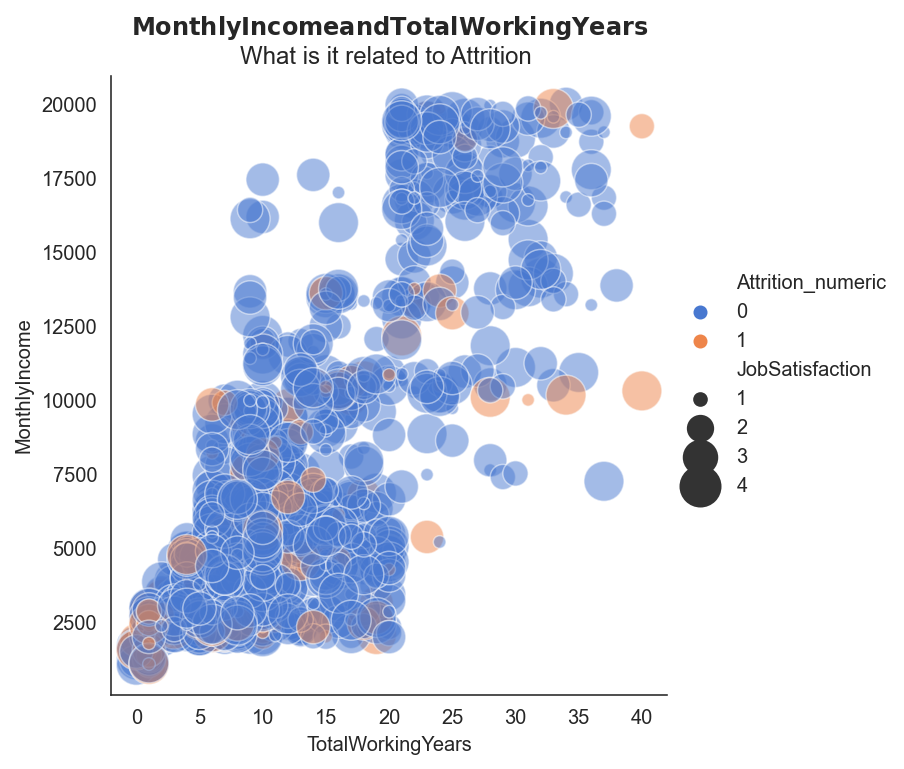

In [44]:

sns.relplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition_numeric', size='JobSatisfaction',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=df)
sns.despine()
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.title("$\\bf{MonthlyIncome and TotalWorkingYears}$" +"\nWhat is it related to Attrition ")
plt.show(block=False)
#fontweight="bold"
# https://stackoverflow.com/questions/53726882/bold-text-in-matplotlib-table

In [36]:
df["Attrition_numeric"].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition_numeric, dtype: float64

# create sample data
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder